<a href="https://colab.research.google.com/github/SuhelAnsari9272/Airbnb_booking_analysis/blob/main/Md_Suhel_Ansari__Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#### 1. Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2. Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 3.Creating DataFrame and Exploring its DataTypes

In [ ]:
file_path='/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path)

In [ ]:
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
airbnb_df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:

airbnb_df.dtypes.reset_index().rename(columns={'index':'Columns',0:'DataTypes'})

,Columns,DataTypes
0,id,int64
1,name,object
2,host_id,int64
3,host_name,object
4,neighbourhood_group,object
5,neighbourhood,object
6,latitude,float64
7,longitude,float64
8,room_type,object
9,price,int64


In [ ]:
airbnb_df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [ ]:
airbnb_df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

#### 4. Checking for null values

In [ ]:
# Percent of null values in Columns.

for column in airbnb_df.columns:
  print(f'Percent of null values in {column} is : {np.round(airbnb_df[column].isnull().mean()*100,2)} %')

Percent of null values in id is : 0.0 %
Percent of null values in name is : 0.03 %
Percent of null values in host_id is : 0.0 %
Percent of null values in host_name is : 0.04 %
Percent of null values in neighbourhood_group is : 0.0 %
Percent of null values in neighbourhood is : 0.0 %
Percent of null values in latitude is : 0.0 %
Percent of null values in longitude is : 0.0 %
Percent of null values in room_type is : 0.0 %
Percent of null values in price is : 0.0 %
Percent of null values in minimum_nights is : 0.0 %
Percent of null values in number_of_reviews is : 0.0 %
Percent of null values in last_review is : 20.56 %
Percent of null values in reviews_per_month is : 20.56 %
Percent of null values in calculated_host_listings_count is : 0.0 %
Percent of null values in availability_365 is : 0.0 %


#### 5.Handling NaN values Spliting the dataset into 2 parts:
* reviewed dataset having non-null review columns
* non-reviewed dataset having null review columns

In [ ]:
# 2 empty lists to capture the ids for the nan values of host_name and name columns respectively
id_for_nan_host_name = []
for val in airbnb_df.loc[airbnb_df.host_name.isna()]['host_id']:
  id_for_nan_host_name.append(val)

id_for_nan_name = []
for val in airbnb_df.loc[airbnb_df.name.isna()]['id']:
  id_for_nan_name.append(val)


In [ ]:
def name_finder(id,name,id_list):
  '''This function checks if the id for name with nan value has any repeatation in other part of the the name column
    with some legitimate names. '''

  for i in range(airbnb_df.shape[0]):
    if id[i] in id_list:
      if name[i] != np.nan:
        print(name[i])
      else:
        pass
    else:
      pass

In [ ]:

name_finder(airbnb_df.id,airbnb_df.name,id_for_nan_host_name)
name_finder(airbnb_df.id,airbnb_df.name,id_for_nan_name)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


We find that the nan values of the column name and host_name doesn't have any legitimate name mentioned in the dataset which we tried seaching using their ids and host_ids respectively.

Hence, we tried to replace those nan values with 'no name'.

In [ ]:
# Handilng NaN values from Name and host_name column

# airbnb_df[['name','host_name']].replace(np.nan,'no name',inplace=True)
airbnb_df[['name','host_name']] = airbnb_df[['name','host_name']].fillna('no name')

In [ ]:
# Converting the time string  to datetime format

airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [ ]:

# Splitting the dataset into reviewed_df for non null review data and non_reviewed_df for null review values.

reviewed_df = airbnb_df.loc[~airbnb_df.last_review.isna() & ~airbnb_df.reviews_per_month.isna()]
reviewed_df.reset_index().drop('index',axis=1,inplace=True)

non_reviewed_df = airbnb_df.loc[airbnb_df.last_review.isna() & airbnb_df.reviews_per_month.isna()]
non_reviewed_df.reset_index().drop('index',axis=1,inplace=True)

In [ ]:
# Replacing nan values of last_review and review_per_month of non_reviewed_df with 0. As we will analysing other aspects of for set.
non_reviewed_df[['last_review','reviews_per_month']] = non_reviewed_df[['last_review','reviews_per_month']].fillna(0) 

In [ ]:
reviewed_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1


In [ ]:
non_reviewed_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0,0.0,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,0,0.0,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0,0.0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0,0.0,1,365


In [ ]:

reviewed_df.last_review.dt.year.value_counts()

2019    25209
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: last_review, dtype: int64

##Suhel
## What can we learn from predictions? (ex: locations, prices, reviews, etc)

####At what price most of the properties are available?

Text(0.5, 0, 'Price of property')

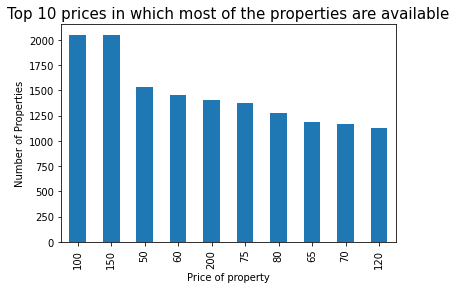

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#Count of properties of with different prices
most_property=airbnb_df['price'].value_counts().sort_values(ascending=False)

#Slicing the Top 10
Top_10_mp=most_property[0:10]

#Plotting the data
Top_10_mp.plot(kind='bar')
plt.title('Top 10 prices in which most of the properties are available',fontsize=15)
plt.ylabel('Number of Properties')
plt.xlabel('Price of property')
#plt.xticks(nbr_df.index,ind,rotation='vertical')

* The price  for above graph ranges the from <b> 50 to 200 </b>
* Most of the properties are available in price of <b> 100 & 150.</b>
* Properties are available for low price and in high price also.

In [ ]:
# Average price of property in different neighbourhood_group
Avg_ppp_ng=pd.DataFrame(airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False))
df = pd.DataFrame()
df['Average_price']=Avg_ppp_ng
df['Neighbourhood_group']=list(Avg_ppp_ng.index)
# plotting the bar chart
fig = px.bar(df, x="Neighbourhood_group", y="Average_price",title='Average price of property in different neighbourhood_group')
 
# showing the plot
fig.show()

* In <b> Manhattan </b> the average price of property is <i> most costly ,ie. almost <b> 197 </b></i>.
* The Average price of property in <b> Bronx </b> is least among all of them.<b> ie. 90.</b>
* The Average price of a property in <b> Staten Island</b> is almost <b> 110</b>.
* The Average price of a property in <b> Queens </b> is almost <b>100</b>.
* The Average price of a property in <b> Brooklyn </b> is almost <b>125.

In [ ]:
#Average price per property of each room_type
Avg_ppp_rt=airbnb_df.groupby('room_type')['price'].mean().sort_values(ascending=False)
df=pd.DataFrame()
df['Room_type']=['Entire home/apt','Private room','Shared room']
df['Average_price']=list(Avg_ppp_rt)


# plotting the bar chart
fig = px.bar(df, x="Room_type", y="Average_price",title='Average price per property of each room_type')
 
# showing the plot
fig.show()


* <b> Entire home/apt </b> is most costly than others.
* The average price for  a <b> Private room </b> is  <b> 90 </b>
* <b> Shared room </b> is availabale for least price .ie <b> 70 </b>

#### Analysis of number of reviews.

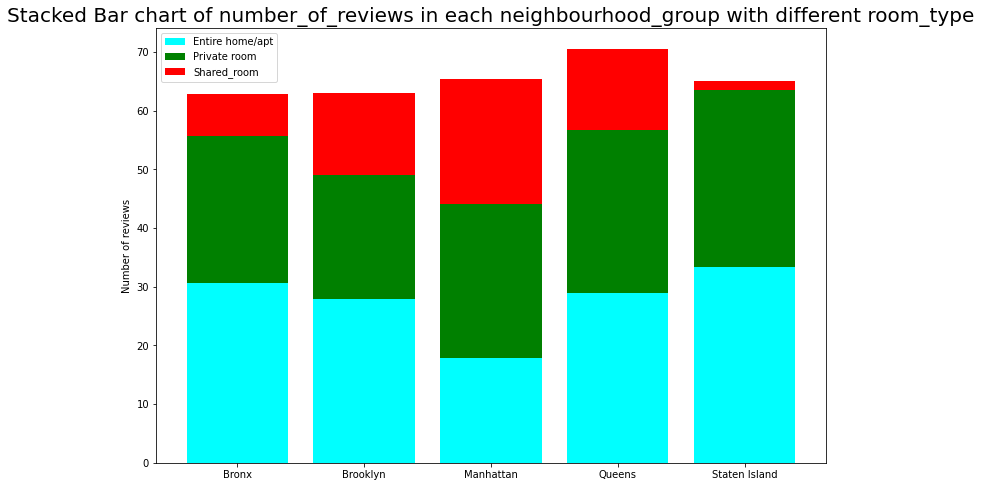

In [ ]:
#To show the number of reviews in each neighbourhood_group with different room_types
nbrhood_grp=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
review_per_rt_nbrgrp=airbnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean()

s=0
y1,y2,y3=[],[],[]
for i in range(len(nbrhood_grp)):
  y1.append(review_per_rt_nbrgrp[s+i])
  y2.append(review_per_rt_nbrgrp[s+i+1])
  y3.append(review_per_rt_nbrgrp[s+i+2])
  s+=2

y1,y2,y3=np.array(y1),np.array(y2),np.array(y3)

#Plot Stacked bar chart
plt.rcParams['figure.figsize'] = (12,8)
plt.bar(nbrhood_grp,y1, color='cyan', label='Entire home/apt')
plt.bar(nbrhood_grp,y2, bottom=y1, color='green', label='Private room')
plt.bar(nbrhood_grp,y3, bottom=y1+y2, color='red', label='Shared_room')
plt.title('Stacked Bar chart of number_of_reviews in each neighbourhood_group with different room_type',fontsize=20)
plt.xlabel=('Neighbourhood_group')
plt.ylabel('Number of reviews')
ax = plt.gca()
#ax.axes.yaxis.set_visible(False)
plt.legend()
plt.show()


* In all the neighbourhood_groups <b>except Manhattan, Entire home/ apt </b> is most number of reviews.
* In <b> Manhattan </b> the highest number of reviews is for <b> Private room.</b> 
* Among all the neighbourhood_groups, <b> Staten Island </b> has most number of reviews for <b><i> Entire home/apt and Private rooms.</b></i>.Also it has least number of reviews for <b><i>Shared room.</b></i>
* <b> Brooklyn & Queens</b> have almost same nubmer of reviews for <b><i> Entire home/apt & Shared room. </b></i>
*<b> Queens</b> have maximum number of reviews among all the neighbourhood_groups.

In [ ]:
#To see the distribution of price in different neighbourhood_group 

fig = px.box(airbnb_df, x="neighbourhood_group", y="price",title='Boxplot showing the distribution of price among neighbourhood_groups')
fig.show()

* Outliers are present in the data so the boxplot are shrinked.

In [ ]:
#Removal of outliers from the price column 

#creating a copy of the dataframe
airbnb_copy_df=airbnb_df.copy()

#Creating funtion to remove outlier using Inter Quantile Range method
def outlier_treatment(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
  
lowerbound,upperbound = outlier_treatment(airbnb_df['price'])
airbnb_copy_df.drop(airbnb_copy_df[ (airbnb_copy_df['price'] > upperbound) | (airbnb_copy_df['price'] < lowerbound) ].index , inplace=True)

In [ ]:
#To see the distribution of price in different neighbourhood_group  After removal of Outliers

fig = px.box(airbnb_copy_df, x="neighbourhood_group", y="price",title='The distribution of price among neighbourhood_groups ,after removal of outliers')
fig.show()

* The price distribution in <b> Manhattan </b> is less skewed than others.

In [ ]:
# The distribution of price in each neighbourhood_group with different room_type 
 
fig = px.box(airbnb_copy_df, x = 'neighbourhood_group', y="price",color='room_type', points="outliers",title='Price Distribution in Neighbourhood_groups with different room_type')
fig.show()

* <b> Staten Island </b> has least median price of <b><i> Shared room </b></i> among all neighbourhood_groups.
* <b>Manhatten </b> is most costly for all the room types on an average.
* <b> Bronx </b> have least variablity in price of rooms_types among all neighbourhood groups & maximum variablity is present in <b> Manhattan.</b>
* <b>Private room </b> is most costly in <b><i> Manhattan </b></i> and is cheaper at <b><i> Staten Island & Bronx .</b></i>
* The price distribution of <b>Shared room </b> is almost same in <b><i> Brooklyn & Queens</b></i>.
* The price of <b> Entire home/apt </b> is highest in <b><i> Manhattan. Staten Island & Bronx </b></i> charges less for <b>Entire home/apt</b>.

#### Who are the top contributing neighbours in each neighbourhood_groups ?

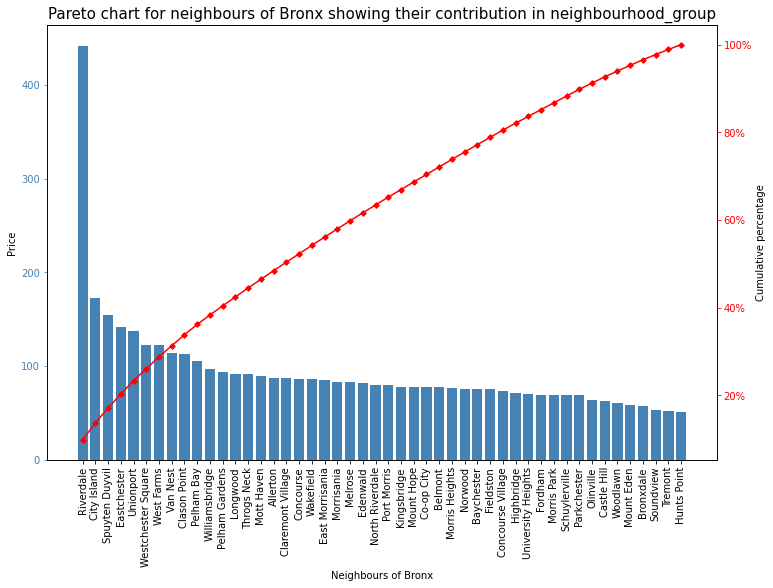

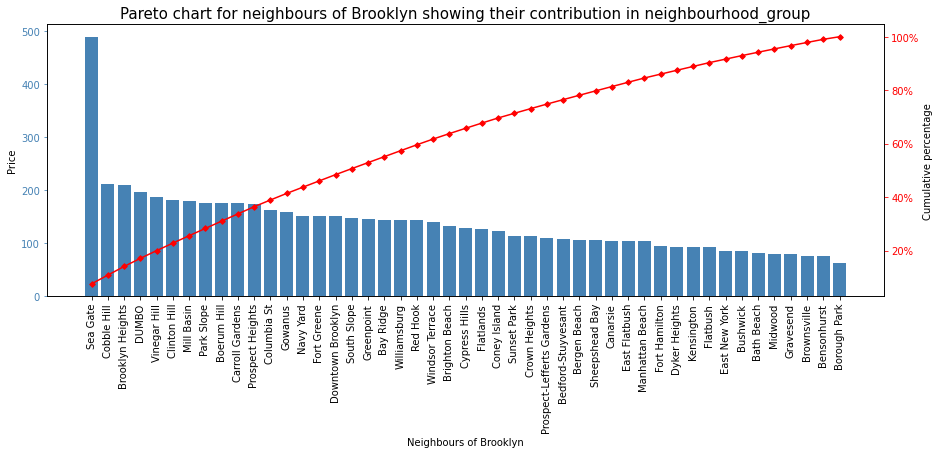

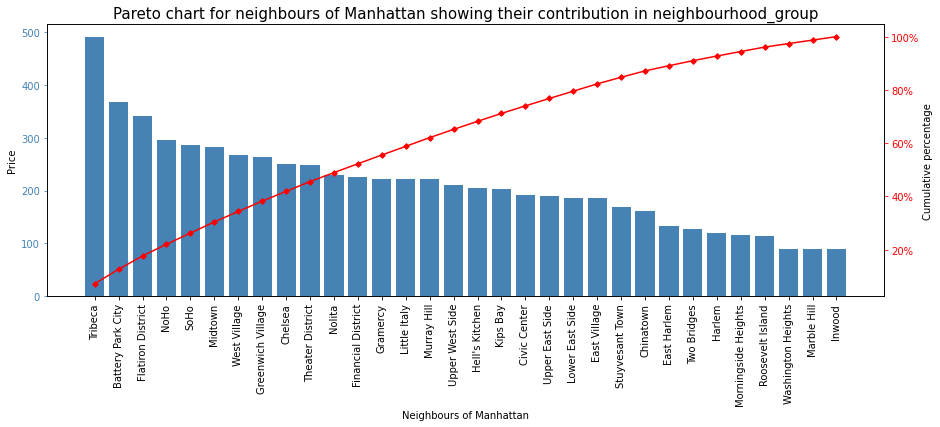

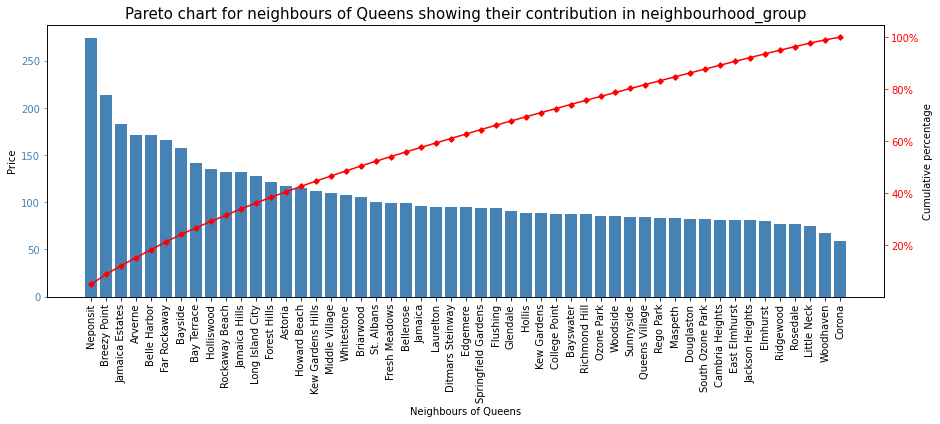

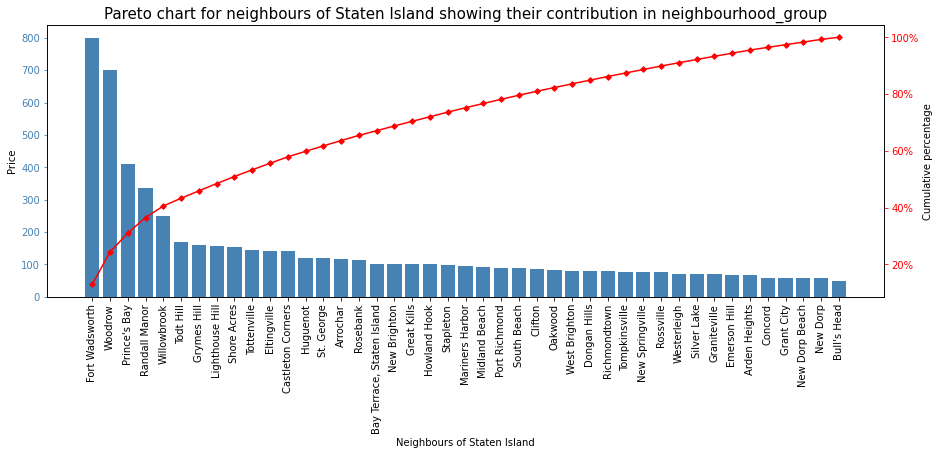

In [ ]:
#Parto chart to see the top price contributing neighbours in different neighbourhood_groups
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
for i in nbrhood_grp:
  nbrhood_df=airbnb_df[airbnb_df['neighbourhood_group']== i]
  nbr_df =pd.DataFrame(nbrhood_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False))
  nbr_df["cumpercentage"] = nbr_df["price"].cumsum()/nbr_df["price"].sum()*100

  col1,col2,line_size = 'steelblue','red',4
  fig, ax = plt.subplots()

  ax.bar(nbr_df.index,nbr_df['price'], color=col1)

  #add cumulative percentage line to plot
  ax2 = ax.twinx()
  ax2.plot(nbr_df.index, nbr_df['cumpercentage'], color=col2, marker="D", ms=line_size)
  ax2.yaxis.set_major_formatter(PercentFormatter())

  #specify axis colors
  ax.tick_params(axis='y', colors=col1)
  ax2.tick_params(axis='y', colors=col2)
  ind=list(nbr_df.index)
  plt.draw()
  ax.set_xticklabels(ax.get_xticks(), rotation =90)
  
  #display the Pareto chart
  plt.rcParams['figure.figsize'] = (15,5)
  plt.title(f'Pareto chart for neighbours of {i} showing their contribution in neighbourhood_group',fontsize=15)
  ax.set_ylabel('Price')
  ax2.set_ylabel('Cumulative percentage')
  ax.set_xlabel(f'Neighbours of {i}')
  plt.xticks(nbr_df.index,ind,rotation='vertical')
  plt.show()


* In <b> Bronx </b> the neighbours <b><i> Riveredale, City Island, Spuytan Duyvil,Eastchester, Unionport,Westchester Square and West Farms </b></i> contributes almost <b>30%</b> in total economy of <b> Bronx.</b>
* In <b>Brooklyn </b> the neighbours <b><i> Sea Gate,Cobble Hill, Brooklyn Heights, DUMBO, Vinegar Hill, Clinton Hill, Mill Basin, Park Slope, Boerum Hill and Carroll Gardens </b></i> contributes almost <b>40%</b> in total economy of <b> Brooklyn </b>.
*For <b> Manhattan </b> the<b> half (50%)</b> of the its economy comes from the top 10 contributers i.e.<b><i> Tribecca, Battery Park City, Flatiron District, NoHo, SoHo, Midtown, West Village, Greenwich Village, Chelsea and Theator District.</b></i>
*For the neighbourhood_group <b> Queens</b> the top 14 neighbours contribute <b> almost 40% </b>of total economy of this neighbourhood_group.
*The neighbours <b><i> Fort Wadsworth, Woodrow, Price's Bay and Randall Manor </b></i> contributes 40% of total economy of <b> Staten Island. 

#### Availability of room_type in different neighbourhood_groups

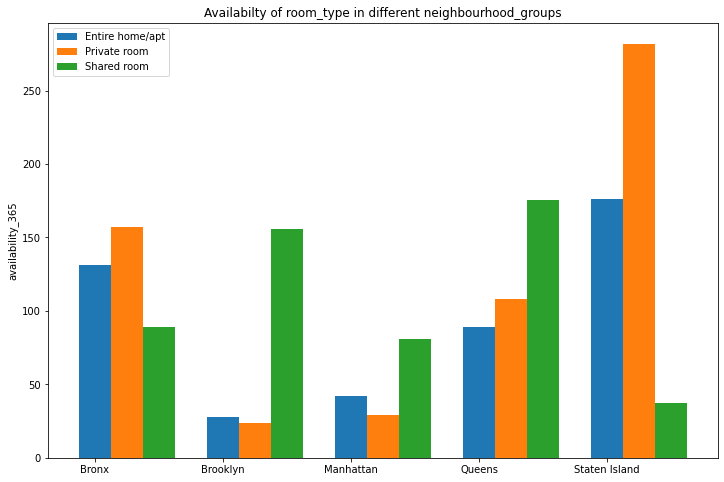

In [ ]:
#side by side bar chart to see the availablity of the rooms in different neighbourhood_groups.
avl_df=airbnb_df.groupby(['neighbourhood_group','room_type'])['availability_365'].median().unstack()
nbrhood_grp=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
Entire_room= list(avl_df['Entire home/apt'])
Private_room=list(avl_df['Private room'])
Shared_room=list(avl_df['Shared room'])

width=0.25
ind = np.arange(len(nbrhood_grp))
  
plt.bar(ind, Entire_room, width , label = 'Entire home/apt')
plt.bar(ind + width,Private_room , width, label = 'Private room')
plt.bar(ind+ width*2,Shared_room, width , label = 'Shared room')
  
plt.xticks(ind,nbrhood_grp)
plt.xlabel=("Neighbourhood_Groups")
plt.ylabel("availability_365")
plt.title("Availabilty of room_type in different neighbourhood_groups")
plt.legend()
plt.show()

* In <b> <i> Staten Island </i> ,Entire home/apt & Private rooms </b> are  easily available but <b> Shared rooms </b> are not easily available.
* On an average, the availbility of rooms of all the types seems to be less in <b>Manhattan </b>.
* It is very hard to get <b> Entire home/ apt & Private rooms </b> in <b><i> Brooklyn and Manhattan</b></i>. But they are easily available in <b><i> Staten Island</b></i>
* The <b>Shared room </B> are mostly available in<b><i> Brooklyn & Queens </b></i>.
* In <b><i> Bronx & Queens </B></i>,all the rooms are easily available.


Conclusion:

1. In the New York City , Manhattan is most busiest neigbourhood .Although being costly than others . It has highest number of reviews for Private rooms. 50% of economy comes from the Top 10 neighbours. So if all the neighbours serves good. Then Mahattan can give more profit.

2. In Staten Island, Shared room is available for the least median price in the New York City. But is least number of reviews indicates that the it may not serves with good quality in low price. Staten Island need to focus on the shared room for the good reviews like Entire home/apt and private rooms.

3. Brooklyn & Queens have almost same distribution in all the form .ie in pricing and reviews of rooms.

4. Bronx have least price of room among all the neighbourhood_groups.Also the rooms are easily available. Despite having the least price, it do not have much traffic. So Bronx need to focus more in order to get a good traffic.


### Hypothesis:The host which has more number of properties.Are they charges less for room price?
##### Null hypothesis H0: There is no correlation between number of host listings count and price.
##### Alternative hypothesis H1:There is some correlation between number of host listings count and price

In [ ]:
#To see the distribution of calculated host listings count and price
# Scatterplot of calculated hosts listing count and Price 
import plotly.express as px
fig = px.scatter(airbnb_df, x='calculated_host_listings_count', y="price")
fig.show()

* Most of the observations are gathered on the calculated hosts listing counts 0-50
* As the calculated host listing counts is a <b> discrete variable</b>  so we need to apply <b><i>spearman rank correlation coefficent</b></i> for calculating the correlation between them.

spearman_s_rank_correlation_coefficient.svg

ρ = Spearman Rank Correlation coefficient \\
di = difference between the two ranks of each observation  \\
n= number of observations

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(airbnb_df['calculated_host_listings_count'], airbnb_df['price'])

#print Spearman rank correlation and p-value
print(f'The value of spearman correlation coefficent is {rho}')
print(f'The p-value of test is {p}')

The value of spearman correlation coefficent is -0.10608308461077175
The p-value of test is 2.3661834310433083e-122


* As the <b> p-value is less than 0.05 significance level, so we will reject the null hypothesis.</b>  Therefore, we conclude that there is some correlation between number of host listings count and price. The sign of correlation is negative, which indicates that as<i> the number of host listings count increases the charge for price decreases.</i>
* So the hosts who has more number of properties they charge less for room price.

### Custom question
####Going through the some negative reviews and comments.The manager wants to make some changes in the rules and regulation .But before making any changes ,He wants to check whether there is some relationship in choosing the room_type with the minimum nights to spend.

### To Check the dependency of room_types with the minimum_nights
##### Null hypothesis H0: Room_type and minimum nights are independent ,ie. there is no relationship between them.
##### Alternative hypothesis H1: Room_type and minimum nights are dependent ,ie. there is some relationship between them.

chi_squared_test.svg

* $Oi$ - Observed value      
* $Ei$ - Expected value

In [ ]:
#Chi -square test to check the dependency of room type with minimum nights.
df_copy=airbnb_df.copy()

#categories of minimum nights column
days=['1_or_2_days','Week','Month','Quarter','Year & +'] 

conditions=[
            (airbnb_df['minimum_nights']<=2),
            ((airbnb_df['minimum_nights']>2) & (airbnb_df['minimum_nights'] <=7)),
            ((airbnb_df['minimum_nights']>7) & (airbnb_df['minimum_nights'] <=30)),
            ((airbnb_df['minimum_nights']>30) & (airbnb_df['minimum_nights'] <=90)),
            (airbnb_df['minimum_nights']>90)
            ]

# creating a new column time_inteval in the dataframe according to the conditions
df_copy['time_interval'] = np.select(conditions, days)

# updated DataFrame
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,time_interval
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1_or_2_days
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1_or_2_days
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Week
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1_or_2_days
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Month


In [ ]:
#count of minimum_nights with room_type in tabular form
tab=df_copy.groupby(['room_type','time_interval'])['time_interval'].count().unstack()

# creating contingency table
data_tab = pd.crosstab(df_copy['room_type'],
                            df_copy['time_interval'],
                           margins=True, margins_name="Total")
data_tab

time_interval,1_or_2_days,Month,Quarter,Week,Year & +,Total
room_type,,,,,,
Entire home/apt,10463,4175,377,10267,127,25409
Private room,13154,2260,164,6686,62,22326
Shared room,799,151,9,193,8,1160
Total,24416,6586,550,17146,197,48895


In [ ]:
# Calculating Chisquare statistic
import scipy.stats as stats
chi_square = 0
rows = df_copy['room_type'].unique()
columns = df_copy['time_interval'].unique()
for i in columns:
    for j in rows:
        O = data_tab[i][j]
        E = data_tab[i]['Total'] * data_tab['Total'][j] / data_tab['Total']['Total']
        chi_square += (O-E)**2/E

#level of significance
alpha=0.05

#test statistic chi-square value
print(f'\n The calculated value of test statistic is {chi_square}')

# The critical value of test statistic at 2 X 4 degress of freedom 
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
print(f'\n The critical value of test statistic is { critical_value}')

# p-value of test
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
print(f'\n The p-value for the test is { p_value}')


 The calculated value of test statistic is 1749.0172864434269

 The critical value of test statistic is 15.50731305586545

 The p-value for the test is 0.0


* As the p-value is <b> less than the significance level 0.05</b>  ,so we will <b>reject the null hypothesis</b>.Therefore , we will conclude that the <b><i>room_types and minimum_nights are not independent </b></i>,i.e. there is some significant relationship between them.
* In choosing the room_type, there is a dependency of minimum nights to spend.